# Quantum chemistry

In this laboratory you will be using the models we developed last week to gain a **quantum intuition** of bonding

We will need to add three more quantum concepts to the list.
- quantisation - only discrete energy levels are allowed
- confinement - as the position becomes more defined the energy/momentum becomes less well defined
- **tunneling - quantum states can extend outside classical boundaries**
- **interference - quantum states can constructively and destructively interfere concentrating charge between bound states**
- **superposition - a single quantum particle can interfere with itself while not being disturbed/measured**

We need a double well to describe two quantum system interacting with each other through tunneling and interference.

We will be running numerical simulations. These are similar to the chemical equilbrium laboratory that we undertook in week 9.

There are limitations to numerical approaches so if you see results that look incorrect the correct solution may not have been attained. Always think critically about numerical simulations and determine whether they are following the correct behaviour. One way to do this is to use a system that has an exact solution so we can compare our numerical solution to determine whether it is correct. We will be using the harmonic oscillator and the particle in a box solutions to check our numerical solutions.

At the end we will use some quantum chemistry software to compute some properties of diatomics and carbon dioxide.

In [1]:
#Importing the important libraries
%matplotlib notebook
#The Schrodinger solver by Matthew Srnec and Shiv Upadhyay will be used
from utils3 import * #This is another file with functions in it to clean up the plotting.
import numpy as np
from IPython.display import clear_output
import ipywidgets as widgets
# atomic units
hbar=1.0
m=1.0
#set precision of numerical approximation
steps=2000

FloatSlider(value=0.5, description='W1', max=10.0, step=0.5)

FloatSlider(value=60.0, description='D1', max=500.0, step=10.0)

FloatSlider(value=0.5, description='W2', max=10.0, step=0.5)

FloatSlider(value=70.0, description='D2', max=500.0, step=10.0)

FloatSlider(value=0.2, description='B', max=2.0, min=0.1)

Checkbox(value=False, description='Probability')

Button(description='Run', style=ButtonStyle())

<IPython.core.display.Javascript object>


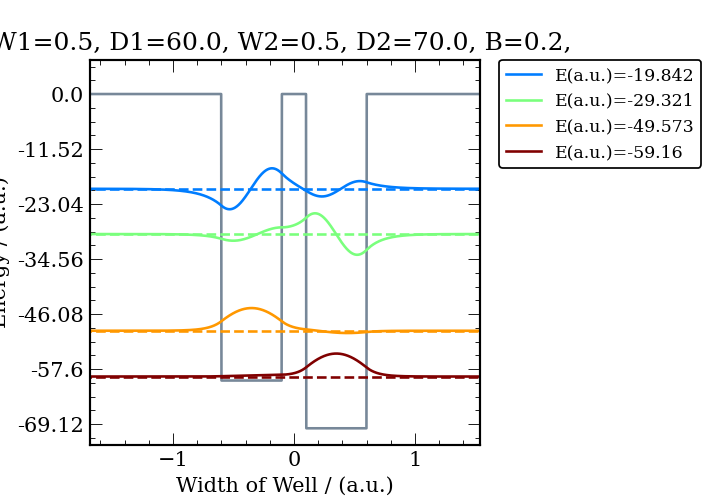

In [2]:
########
# PARTICLE IN A DOUBLE FINITE WELL OF WIDTHS(W1 and W2), DIFFERENT DEPTHS
# (D1 and D2) AND DISTANCE (B) APART
########
Case=4
########
# INPUT
########
#set depths and widths of wells and the well separation
#W1=1.0 # this value must be between 0.5 and 10
W1 = widgets.FloatSlider(value=0.5,min=0,max=10,step=0.5, description="W1")
D1 = widgets.FloatSlider(value=60.0,min=0,max=500,step=10, description="D1")
W2 = widgets.FloatSlider(value=0.5,min=0,max=10,step=0.5, description="W2")
D2 = widgets.FloatSlider(value=70.0,min=0,max=500,step=10, description="D2")

B = widgets.FloatSlider(value=0.2,min=0.1,max=2,step=0.1, description="B")

squared_2 = widgets.Checkbox(value=False,description="Probability")

#W2=0.5 # this value must be between 0.5 and 10
#D1=60.0 # this value must be between 30 and 500
#D2=70.0 # this value must be between 30 and 500
#B=0.2 # this value must be between 0.1 and 10
########
# CODE
########

# print output
#output(Case,['Well 1 Width','Well 2 Width','Well 1 Depth','Well 2 Depth','Well Separation'],[W1,W2,D1,D2,B*2],E,n)
# create plot

@debounce(0.1) #https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Events.html#Debouncing
def handle_slider_change_2(change):
    clear_output()
    #set length variable for xvec
    A=2.0*((W1.value+W2.value)+B.value)
    #divide by two so a separation from -B to B is of input size")
    B_=B.value/2.0
    #create x-vector from -A to A")
    xvec=np.linspace(-A,A,steps,dtype=np.float_)
    #get step size")
    h=xvec[1]-xvec[0]
    #create the potential from step function")
    U=-D1.value*(step_func(xvec+W1.value+B_)-step_func(xvec+B_))-D2.value*\
        (step_func(xvec-B_)-step_func(xvec-W2.value-B_))
    #create Laplacian via 3-point finite-difference method")
    Laplacian=(-2.0*np.diag(np.ones(steps))+np.diag(np.ones(steps-1),1)\
        +np.diag(np.ones(steps-1),-1))/(float)(h**2)
    #create the Hamiltonian")
    Hamiltonian=np.zeros((steps,steps))
    [i,j]=np.indices(Hamiltonian.shape)
    Hamiltonian[i==j]=U
    Hamiltonian+=(-0.5)*((hbar**2)/m)*Laplacian
    #diagonalize the Hamiltonian yielding the wavefunctions and energies")
    E,V=diagonalize_hamiltonian(Hamiltonian)
    #determine number of energy levels to plot (n)")
    n=0
    while E[n]<0:
        n+=1   
    
    display(W1,D1,W2,D2,B,squared_2,button_2)
    finite_well_plot(E,V,xvec,steps,n,Case,U,param=[W1,D1,W2,D2,B],ask_to_save=False,ask_squared=squared_2.value)
    #plt.xlim((-5,5))

button_2 = widgets.Button(description="Run")

button_2.on_click(handle_slider_change_2)

display(W1,D1,W2,D2,B,squared_2,button_2)

## Lab report

### Quantum interference

For the second section on quantum interference complete the following tasks using screenshots of the simulated plot to aid your answers.

**Task 7** - Plot the single well solution by setting D1=0.0, W2=0.5 and D2=200. Compare this solution to the harmonic oscillator from last weeks lab.

**Task 8** - Plot the probability for the solution in Task 1 (this can take some time). The probability of finding a particle is outside of the potential energy surface a classically forbidden region. This is called tunneling where the wavefunction decays exponentially in the barrier. How does tunneling compare between the lowest energy bound state and the highest energy bound state?

**Task 9** - To further explore tunneling we are going to look at two mismatched quantum systems W1=0.5, D1=50.0, W2=0.5, D2=100. Plot the wells far from each other B=5. Compare this system with the wells close together B=0.4. Which states can tunnel into the other well? How much does the energy decrease with this tunneling?

**Task 10** - Let's now compare a matched double well to look at interference W1=0.5, D1=100, W2=0.5, D2=100. Plot the results far away B=2.0. You will see that the energy levels are degenerate (the same). However, one is out of phase with the other. These are non-interacting systems. Plot the results for B=0.5. The top two states will be constructively and destructively interfering (one state gets high and one lower in energy). 

**Task 11** - Plot the probability of the Task 4 system. Which state has a higher probability of being in between the wells? In a molecule the nuclei provide the potential energy pull and the electrons are described by the wavefunctions. Explain how the constructive interference holds the nuclei together in a bond. 